# Audio representation

In [10]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import smd.data.preprocessing.config as config
from presets import Preset
import librosa as _librosa
import librosa.display as _display
import os
import time
from IPython.display import Audio

In [2]:
AUDIO_FILE_PATH = "/Users/quentin/Computer/DataSet/Music/speech_music_detection/gtzan/music_wav/redhot.wav"
DURATION = None
MONO = True

_librosa.display = _display

librosa = Preset(_librosa)
librosa['sr'] = config.SAMPLING_RATE
librosa['hop_length'] = config.HOP_LENGTH
librosa['n_fft'] = config.FFT_WINDOW_SIZE

## Audio signal

In [5]:
t0 = time.time()
y = librosa.load(AUDIO_FILE_PATH, duration=DURATION, mono=MONO)[0]
t1 = time.time()

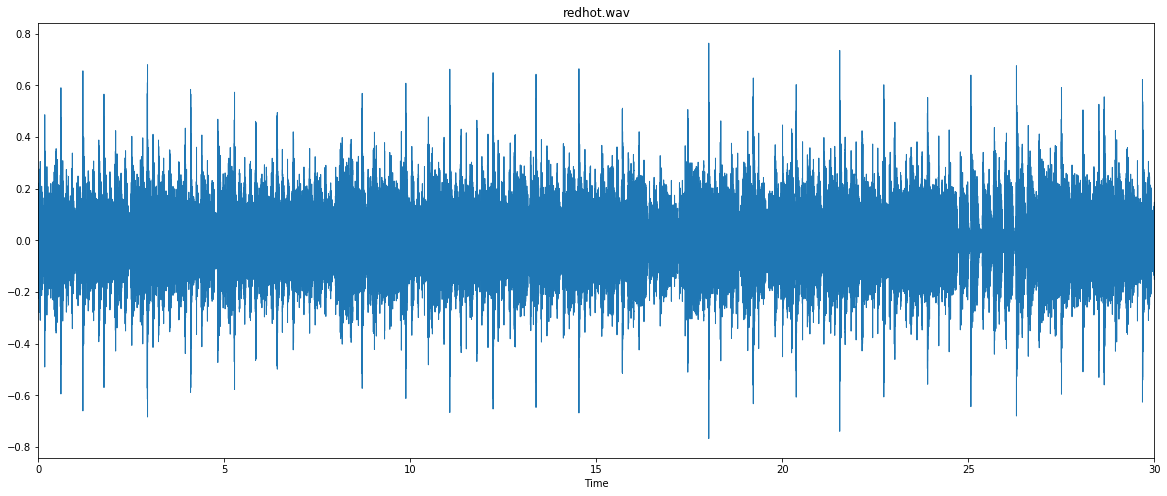

In [19]:
plt.figure(figsize=(20, 8))
librosa.display.waveplot(y)
plt.title(os.path.basename(AUDIO_FILE_PATH))
plt.show()

In [14]:
S_temp = librosa.core.stft(y)
t2 = time.time()
S = librosa.feature.melspectrogram(y=y, n_mels=config.N_MELS, fmin=config.F_MIN, fmax=config.F_MAX)
S = librosa.power_to_db(S)
t3 = time.time()
print("Processing duration: " + repr(t3 - t2) + "s")

Processing duration: 0.07971978187561035s


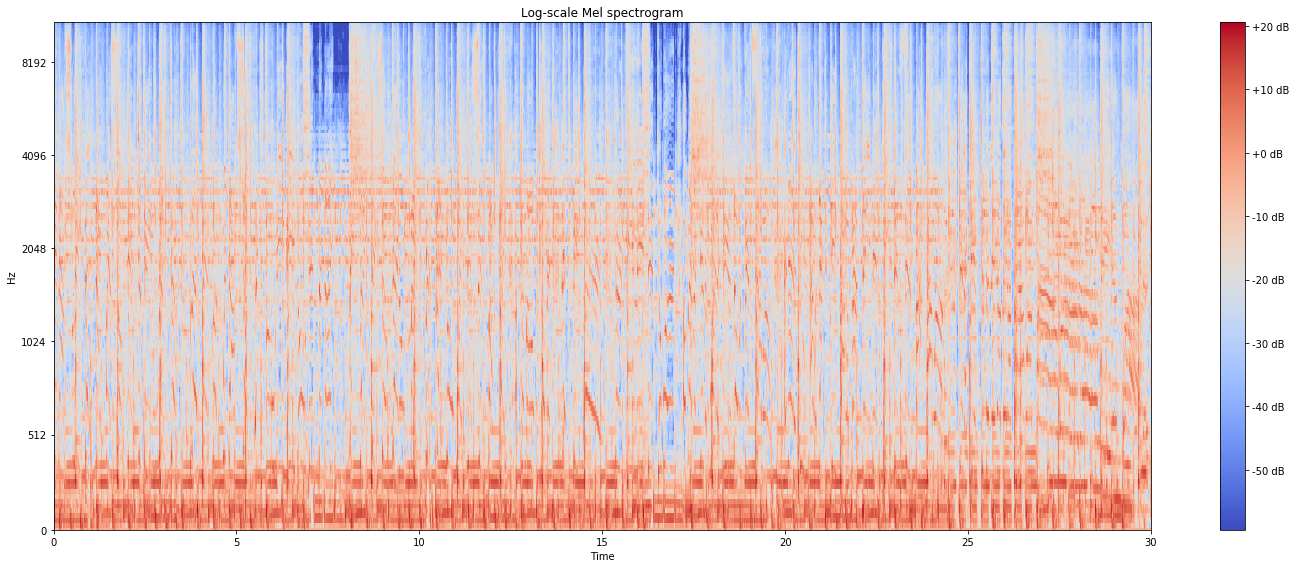

In [20]:
plt.figure(figsize=(20,8))
librosa.display.specshow(S, y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-scale Mel spectrogram')
plt.tight_layout()
plt.show()

## Statistics

In [22]:
duration = librosa.get_duration(y)
print("Loading duration: " + repr(t1 - t0) + "s")
print("Processing duration: " + repr(t3 - t2) + "s")
print("Duration of the audio sample: " + repr(duration) + "s")
print("New sampling rate : " + repr(config.SAMPLING_RATE))
print("Number of frame : " + repr(S.shape[1]))
print("Number of coefficient: ", config.N_MELS)
print("Duration of a frame: " + repr(duration / S.shape[1]))
print("Output shape: ", S.shape)
print("STFT shape: ", S_temp.shape)

Loading duration: 0.030010223388671875s
Processing duration: 0.07971978187561035s
Duration of the audio sample: 30.0s
New sampling rate : 22050
Number of frame : 2406
Number of coefficient:  128
Duration of a frame: 0.012468827930174564
Output shape:  (128, 2406)
STFT shape:  (552, 2406)


## Data augmentation

In [3]:
from smd.data.data_augmentation import *

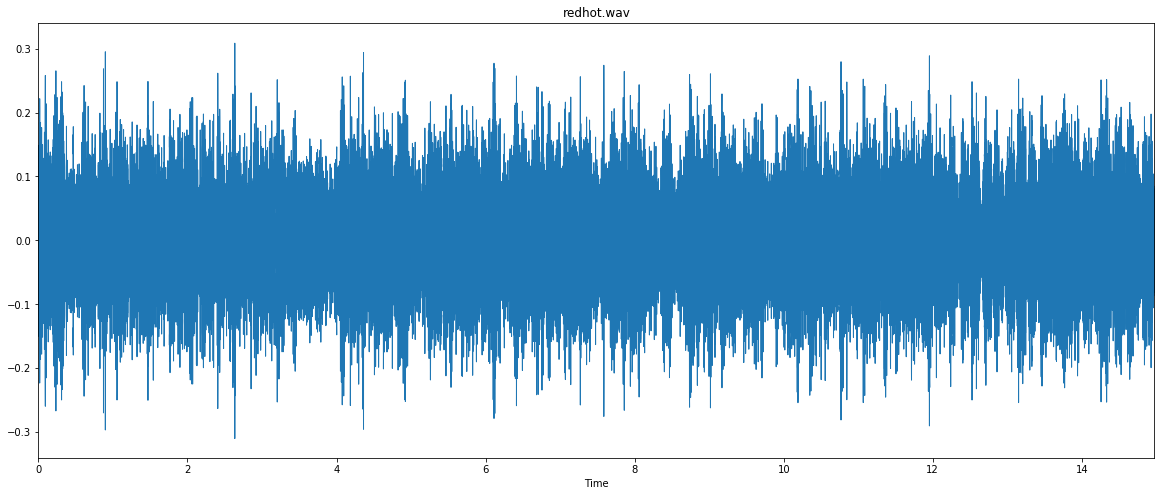

In [15]:
new_y = time_stretching(y, rate=2)[0]

plt.figure(figsize=(20, 8))
librosa.display.waveplot(new_y)
plt.title(os.path.basename(AUDIO_FILE_PATH))
plt.show()
Audio(new_y, rate=22050)

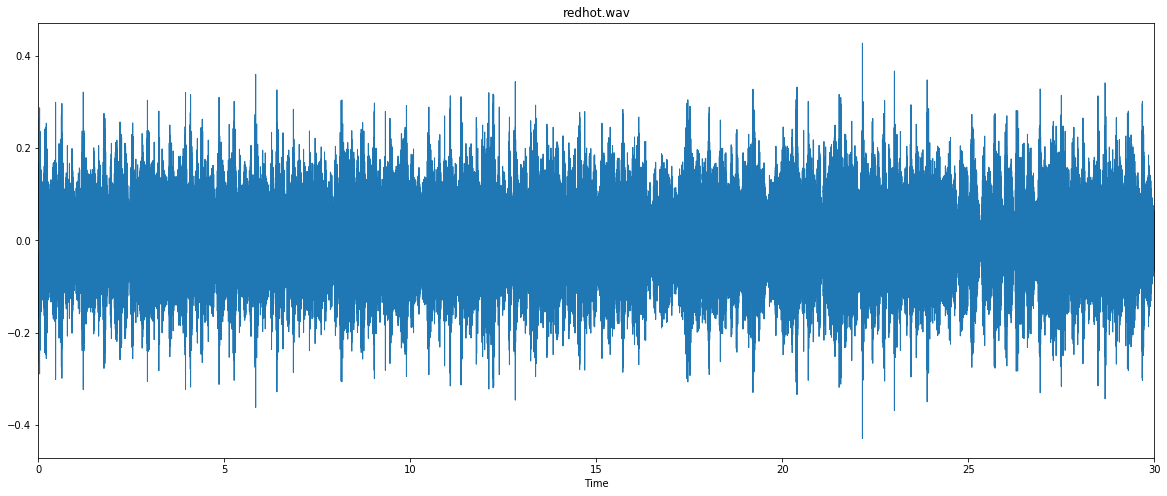

In [16]:
new_y = pitch_shifting(y, n_steps=4)

plt.figure(figsize=(20, 8))
librosa.display.waveplot(new_y)
plt.title(os.path.basename(AUDIO_FILE_PATH))
plt.show()
Audio(new_y, rate=22050)

[0.08999634 0.14868164 0.17251587 ... 0.09646606 0.11129761 0.06411743]


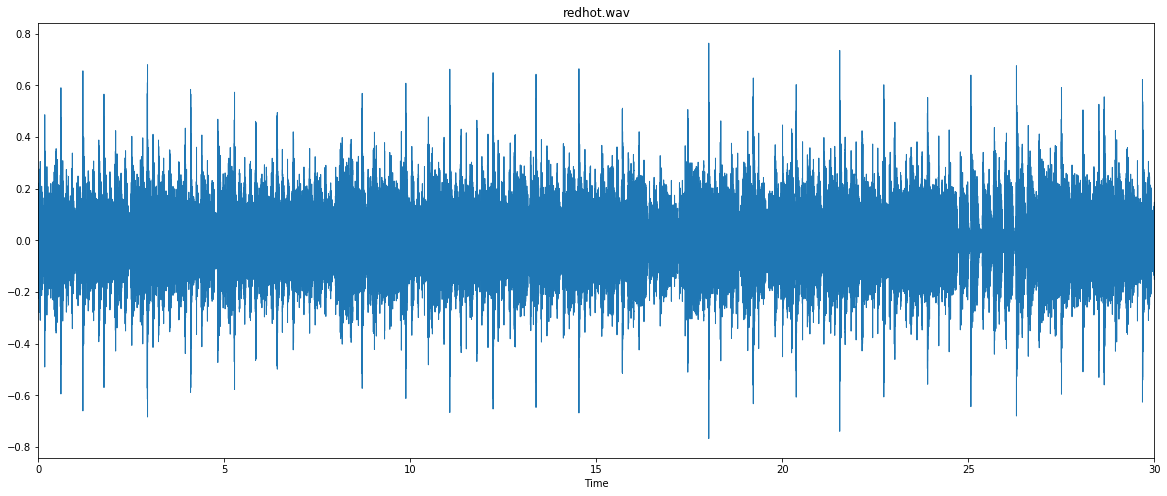

In [19]:
new_y = y
print(y)

plt.figure(figsize=(20, 8))
librosa.display.waveplot(new_y)
plt.title(os.path.basename(AUDIO_FILE_PATH))
plt.show()
Audio(new_y, rate=22050)